<a href="https://colab.research.google.com/github/excuation/machine-learning/blob/main/currencyclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

# Define dataset directory
data_dir = "dataset"  # Change this to your dataset path

# Define image parameters
img_size = (128, 128)
batch_size = 16
num_classes = 7  # Change this based on your dataset

# Data Augmentation & Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-10-10 split
)

train_generator = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load MobileNetV2 (Pretrained Model)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Build custom model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
out = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=60)

# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Validation Accuracy: {val_acc * 100:.2f}%")
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")

# Save model
model.save("currency_classifier.h5")
print("✅ Optimized model saved successfully!")


Found 35 images belonging to 7 classes.
Found 7 images belonging to 7 classes.
Found 42 images belonging to 7 classes.
Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.0560 - loss: 5.1025 - val_accuracy: 0.1429 - val_loss: 4.2922
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.1694 - loss: 4.5872 - val_accuracy: 0.1429 - val_loss: 4.0900
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3117 - loss: 3.6864 - val_accuracy: 0.1429 - val_loss: 4.0758
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.3719 - loss: 3.8342 - val_accuracy: 0.0000e+00 - val_loss: 3.9971
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.5016 - loss: 3.1938 - val_accuracy: 0.2857 - val_loss: 3.8326
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.4432 - loss: 3.5765 - val_accuracy: 0.1429 - val_loss: 3.9887
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.4276 - loss: 3.3316 - val_accuracy: 0.1429 - val_loss: 4.02

✅ Validation Accuracy: 42.86%
✅ Test Accuracy: 88.10%
✅ Optimized model saved successfully!


In [25]:
model.save("my_model.keras")


In [26]:
test_loss, test_acc = model.evaluate(validation_generator)  # Use test_generator if available
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8571 - loss: 1.6194
Test Accuracy: 85.71%


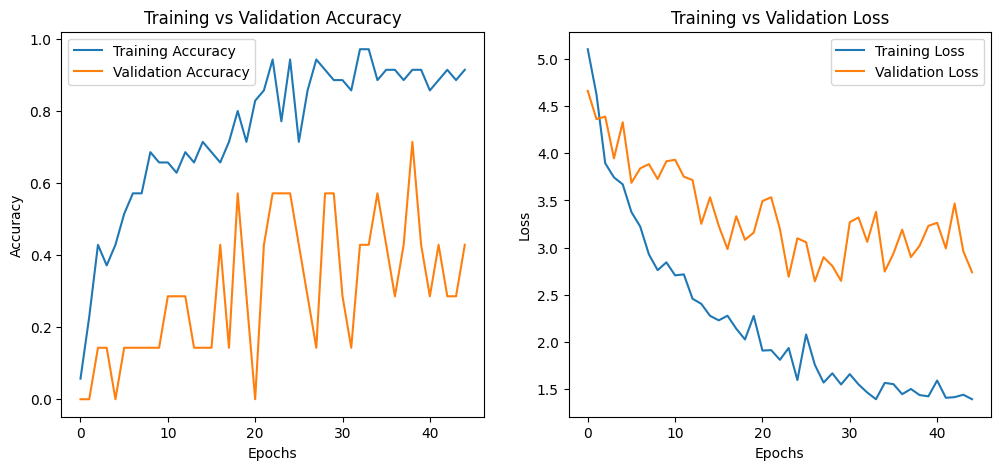

In [27]:
import matplotlib.pyplot as plt

# Get accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")

plt.show()
